In [1]:
import sys
sys.path.append('..')
from settings import *
from lattice.opticallattice import *
import matplotlib.colors as colors

# Geomtry beam (for pinning lattice)

This notebook contains calculations for the geometry beam of the pinning lattice that allows for tuning of the lattice structure. 

In [ ]:
temp

Text(0.5, 1.0, 'Geometry beam trap depth (including losses)')

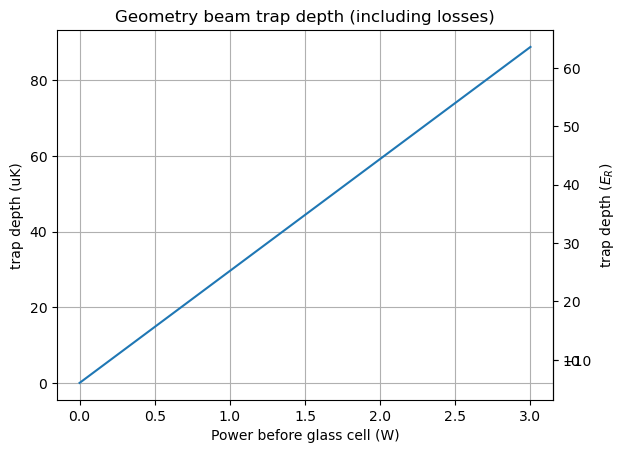

In [38]:
geom_beam = OpticalLattice1D(a=532e-9)

P = np.linspace(0,3,1000) # power: watts

t = 0.91
eta_boost = (t+t**3)**2
U = power2freq(power=P, waist=60e-6) * eta_boost

# converting freq to uK
freq_to_uk = lambda x: freq2temp(abs(x))*1e6
# inverse
uk_to_freq = lambda x: temp2freq(x/1e6)

# converting freq to recoil
uk_to_Er = lambda x: uk_to_freq(x)/geom_beam.Er
#inverse
Er_to_uk = lambda x: freq_to_uk(x*geom_beam.Er)


y = geom_beam.trap_freq(U)

fig,ax=plt.subplots(1)

ax.plot(P, freq_to_uk(U), '-',label='geometry beam')
ax.set_xlabel('Power before glass cell (W)')
ax.set_ylabel('trap depth (uK)')
plt.grid()
secax_y = ax.secondary_yaxis('right', functions =(uk_to_Er, Er_to_uk))
secax_y.set_ylabel('trap depth ($E_R$)')
ax.set_title('Geometry beam trap depth (including losses)')

In [39]:
np.min(U)/geom_beam.Er

-63.305943848383286